---



---


# <center> Exploratory Data Analysis - English Premier League(2023)</center>

---



---


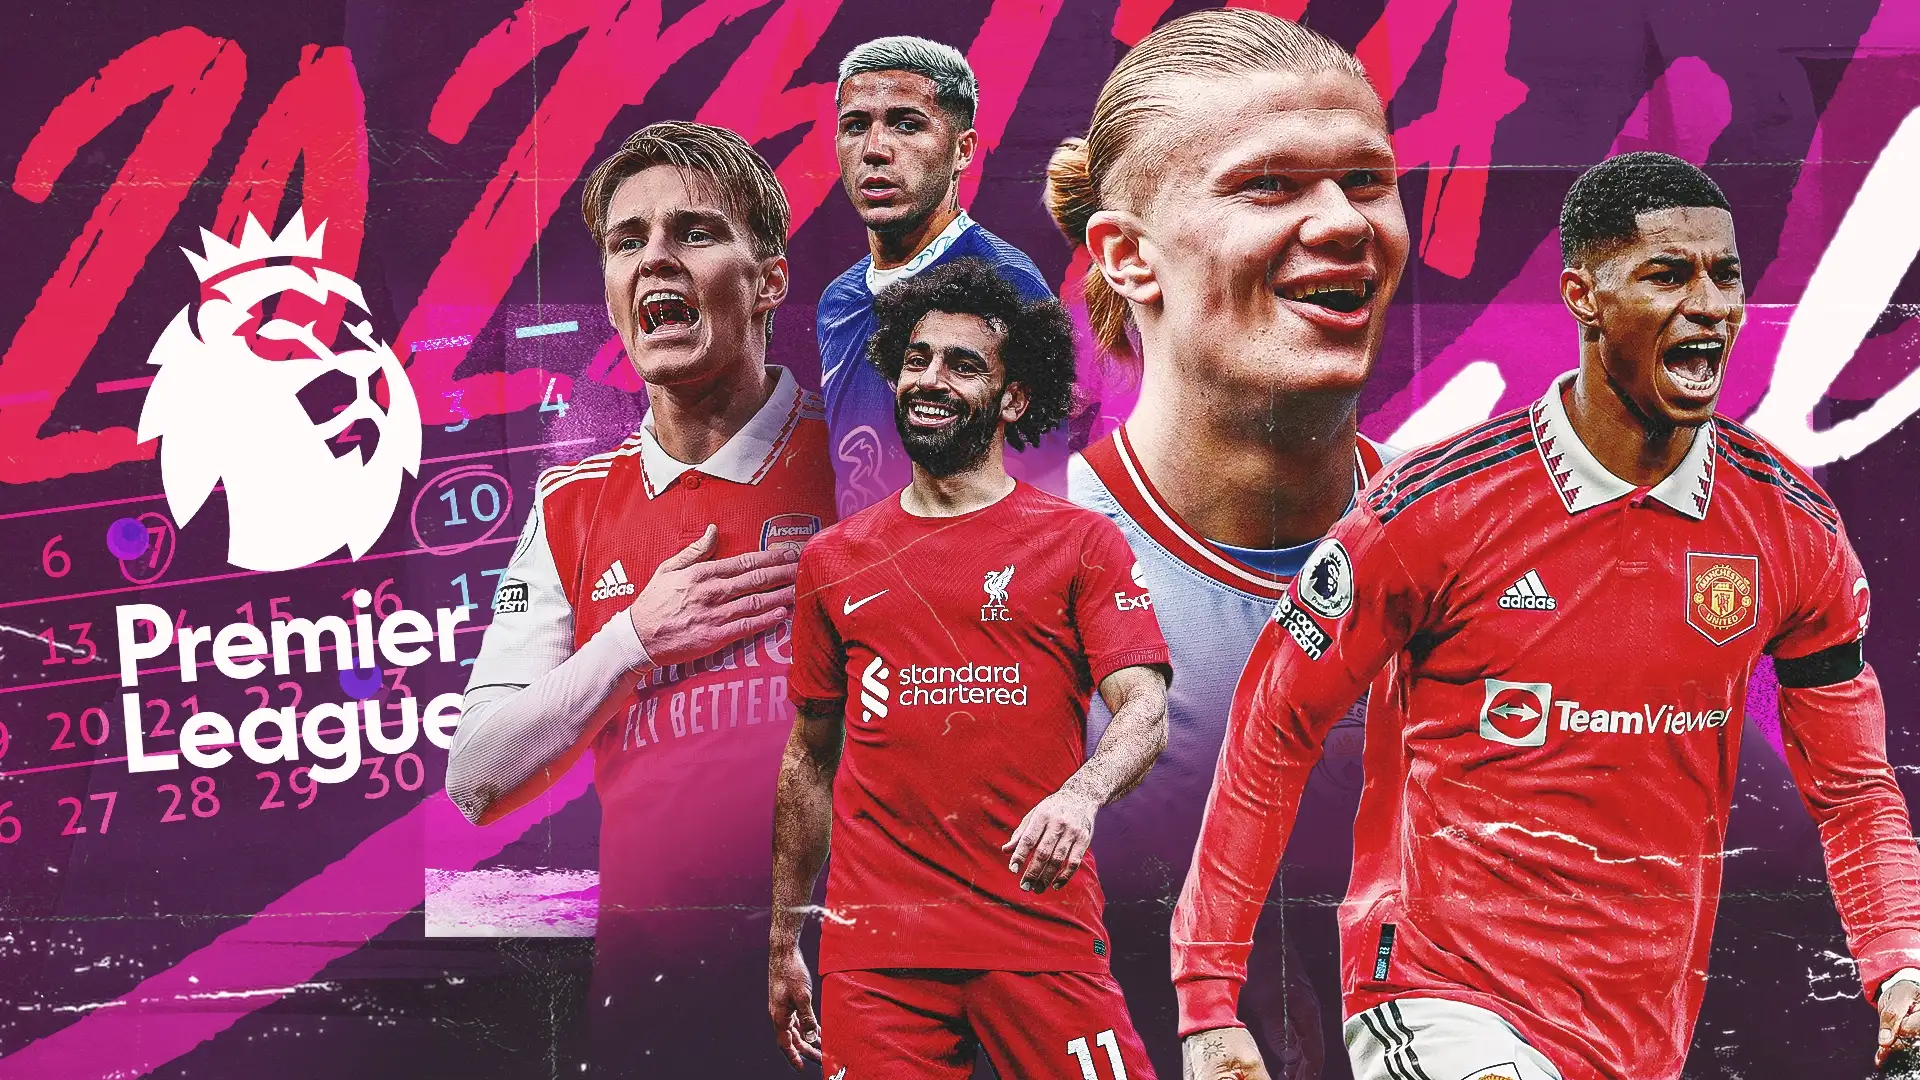

Image source: https://www.threads.net/@ola_kunley/post/C8XigRHtk5M

---

### Introduction:

#### The Premier League
The Premier League, commonly known internationally as the English Premier League (EPL), is the highest tier of the English football league system. Comprising 20 clubs, it follows a promotional and relegation structure in collaboration with the English Football League (EFL) Associations. The season spans from August to May, during which each team competes in 38 matches, facing all 19 other teams both home and away games.

#### Dataset
In this project, I will utilize the Football-Data.org API to extract data related to matches from the 2023/2024 English Premier League season. This data will serve as the foundation for conducting exploratory data analysis (EDA) to identify underlying patterns, trends, and relationships, particularly focusing on team performance and match outcomes.

The dataset encompasses the results of football matches, featuring information on encounters between each of the 20 teams in the league, with each team playing 38 matches against the others. 

The dataset includes 380 matches with the following key attributes:

* Match Date: Indicates when the match was played, which allows for time-based analysis.

* Home Team: The team that played at home.

* Away Team: The visiting team.

* Home Score: The score achieved by the home team.

* Away Score: The score achieved by the away team.

* Status: The final status of the match (e.g., "FINISHED").

* Match ID: A unique identifier for each match.


**In this exploratory data analysis (EDA), I aim to answer the following key questions:**

* What is the distribution of home and away scores across the matches?

* Which team has the best performance (based on win rate)?

* How frequently do matches result in draws, and are home teams generally more successful?

* How does the performance vary over time (month/seasonal trends)?

* Which teams tend to score the most goals?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from dotenv import load_dotenv
import os
import plotly.express as px

%matplotlib inline

#### Environment variables, and API Key setup

In [2]:
# Loading the Football-Data.org API key from the .env file 
load_dotenv()

# Accessing the API key
api_key = os.getenv('FOOTBALL_API_KEY')


### Data retrieval

In [3]:
# Defining the base URL for Football-Data.org API
base_url = "https://api.football-data.org/v4"

# Setting the request headers to include your API key
headers = {
    "X-Auth-Token": api_key
}

# EPL matches for the 2023 season

url = f"{base_url}/competitions/PL/matches?season=2023"

# Sending the request to the API
response = requests.get(url, headers=headers)

# Converting response to JSON
epl_data = response.json()

# Printing the first few matches for inspection
for match in epl_data['matches'][:5]:
    print(f"Match: {match['homeTeam']['name']} vs {match['awayTeam']['name']} on {match['utcDate']}")

Match: Burnley FC vs Manchester City FC on 2023-08-11T19:00:00Z
Match: Arsenal FC vs Nottingham Forest FC on 2023-08-12T12:00:00Z
Match: AFC Bournemouth vs West Ham United FC on 2023-08-12T14:00:00Z
Match: Brighton & Hove Albion FC vs Luton Town FC on 2023-08-12T14:00:00Z
Match: Everton FC vs Fulham FC on 2023-08-12T14:00:00Z


In [4]:
# Inspect the keys
epl_data.keys()

dict_keys(['filters', 'resultSet', 'competition', 'matches'])

In [5]:
# Pretty-print the JSON data with indentation
print(json.dumps(epl_data, indent=4))


{
    "filters": {
        "season": 2023
    },
    "resultSet": {
        "count": 380,
        "first": "2023-08-11",
        "last": "2024-05-19",
        "played": 380
    },
    "competition": {
        "id": 2021,
        "name": "Premier League",
        "code": "PL",
        "type": "LEAGUE",
        "emblem": "https://crests.football-data.org/PL.png"
    },
    "matches": [
        {
            "area": {
                "id": 2072,
                "name": "England",
                "code": "ENG",
                "flag": "https://crests.football-data.org/770.svg"
            },
            "competition": {
                "id": 2021,
                "name": "Premier League",
                "code": "PL",
                "type": "LEAGUE",
                "emblem": "https://crests.football-data.org/PL.png"
            },
            "season": {
                "id": 1564,
                "startDate": "2023-08-11",
                "endDate": "2024-05-19",
                "curren

In [6]:
# List all top-level keys
top_level_keys = epl_data.keys()
print("Top-level keys:", top_level_keys)


Top-level keys: dict_keys(['filters', 'resultSet', 'competition', 'matches'])


In [7]:
# Inspect the structure of the first match in the 'matches' list
matches = epl_data['matches']

# Print out the first match in a readable format
print(json.dumps(matches[0], indent=4))



{
    "area": {
        "id": 2072,
        "name": "England",
        "code": "ENG",
        "flag": "https://crests.football-data.org/770.svg"
    },
    "competition": {
        "id": 2021,
        "name": "Premier League",
        "code": "PL",
        "type": "LEAGUE",
        "emblem": "https://crests.football-data.org/PL.png"
    },
    "season": {
        "id": 1564,
        "startDate": "2023-08-11",
        "endDate": "2024-05-19",
        "currentMatchday": 38,
        "winner": null
    },
    "id": 435943,
    "utcDate": "2023-08-11T19:00:00Z",
    "status": "FINISHED",
    "matchday": 1,
    "stage": "REGULAR_SEASON",
    "group": null,
    "lastUpdated": "2024-06-02T20:20:54Z",
    "homeTeam": {
        "id": 328,
        "name": "Burnley FC",
        "shortName": "Burnley",
        "tla": "BUR",
        "crest": "https://crests.football-data.org/328.png"
    },
    "awayTeam": {
        "id": 65,
        "name": "Manchester City FC",
        "shortName": "Man City",
   

In [9]:
# Print the 'score' field for the first match to inspect its structure
print(json.dumps(matches[0]['score'], indent=4))


{
    "winner": "AWAY_TEAM",
    "duration": "REGULAR",
    "fullTime": {
        "home": 0,
        "away": 3
    },
    "halfTime": {
        "home": 0,
        "away": 2
    }
}


### Data Cleaning and Preprocessing

In [10]:
# Extract relevant match data into a list, including Match ID
matches_data = []
for match in epl_data['matches']:
    match_info = {
        'Match Date': match.get('utcDate', None),
        'Home Team': match.get('homeTeam', {}).get('name', None),
        'Away Team': match.get('awayTeam', {}).get('name', None),
        'Home Score': match.get('score', {}).get('fullTime', {}).get('home', None),
        'Away Score': match.get('score', {}).get('fullTime', {}).get('away', None),
        'Status': match.get('status', None),
        'Match ID': match.get('id', None)  
    }
    matches_data.append(match_info)

# Convert the list into a pandas DataFrame
df_matches = pd.DataFrame(matches_data)

# Display the DataFrame with the Match ID
print(df_matches.head())


             Match Date                  Home Team             Away Team  \
0  2023-08-11T19:00:00Z                 Burnley FC    Manchester City FC   
1  2023-08-12T12:00:00Z                 Arsenal FC  Nottingham Forest FC   
2  2023-08-12T14:00:00Z            AFC Bournemouth    West Ham United FC   
3  2023-08-12T14:00:00Z  Brighton & Hove Albion FC         Luton Town FC   
4  2023-08-12T14:00:00Z                 Everton FC             Fulham FC   

   Home Score  Away Score    Status  Match ID  
0           0           3  FINISHED    435943  
1           2           1  FINISHED    435944  
2           1           1  FINISHED    435945  
3           4           1  FINISHED    435946  
4           0           1  FINISHED    435947  


In [11]:
df_matches.head()

,Match Date,Home Team,Away Team,Home Score,Away Score,Status,Match ID
0,2023-08-11T19:00:00Z,Burnley FC,Manchester City FC,0,3,FINISHED,435943
1,2023-08-12T12:00:00Z,Arsenal FC,Nottingham Forest FC,2,1,FINISHED,435944
2,2023-08-12T14:00:00Z,AFC Bournemouth,West Ham United FC,1,1,FINISHED,435945
3,2023-08-12T14:00:00Z,Brighton & Hove Albion FC,Luton Town FC,4,1,FINISHED,435946
4,2023-08-12T14:00:00Z,Everton FC,Fulham FC,0,1,FINISHED,435947


In [12]:
# Check shape of the dataset

df_matches.shape

(380, 7)

In [13]:
# Check for df dtypes and fix if necessary
df_matches.dtypes

Match Date    object
Home Team     object
Away Team     object
Home Score     int64
Away Score     int64
Status        object
Match ID       int64
dtype: object

In [14]:
# Since Match Date is in an object format, convert it to datetime format
df_matches['Match Date'] = pd.to_datetime(df_matches['Match Date'], errors='coerce')

df_matches.dtypes

Match Date    datetime64[ns, UTC]
Home Team                  object
Away Team                  object
Home Score                  int64
Away Score                  int64
Status                     object
Match ID                    int64
dtype: object

In [15]:
# Check for missing values
df_matches.isnull().sum()

Match Date    0
Home Team     0
Away Team     0
Home Score    0
Away Score    0
Status        0
Match ID      0
dtype: int64

In [16]:
# Check for duplicates
df_matches.duplicated().sum()

0

In [17]:
# Perform descriptive analysis

df_matches.describe()

,Home Score,Away Score,Match ID
count,380.000000,380.000000,380.000000
mean,1.800000,1.478947,436132.500000
std,1.365616,1.277811,109.840794
min,0.000000,0.000000,435943.000000
25%,1.000000,1.000000,436037.750000
50%,2.000000,1.000000,436132.500000
75%,3.000000,2.000000,436227.250000
max,6.000000,8.000000,436322.000000


**The summary statistics for the home and away scores:**

**Home Score:**

* Average (Mean): 1.80 goals per match
* Standard Deviation: 1.37 (indicating moderate variability in home team scoring)
* Minimum: 0 goals (some teams failed to score)
* Maximum: 6 goals in a match
* Median (50%): The median home score is 2, meaning that 50% of home teams scored 2 goals or fewer in their matches.

**Away Score:**

* Average (Mean): 1.48 goals per match
* Standard Deviation: 1.28 (slightly lower variability than home scores)
* Minimum: 0 goals
* Maximum: 8 goals (indicating an exceptional away performance)
* Median (50%): The median away score is 1, indicating that away teams tend to score less, with half of the away teams scoring only 1 goal or fewer.

* The home teams generally score more goals than the away teams, with home teams achieving a higher average and median score.

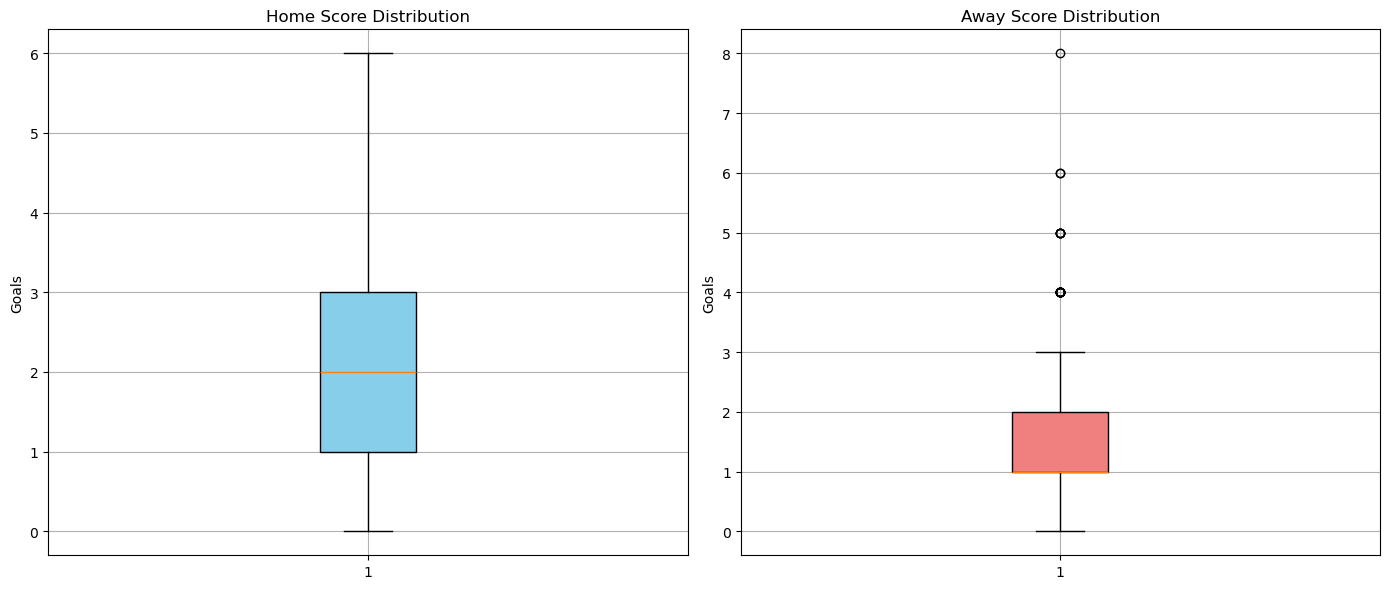

In [18]:
#Visualise the descriptive stat using boxplot
# Creating subplots to visualize the distribution of Home and Away Scores
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Home Scores
ax[0].boxplot(df_matches['Home Score'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax[0].set_title('Home Score Distribution')
ax[0].set_ylabel('Goals')
ax[0].grid(True)

# Boxplot for Away Scores
ax[1].boxplot(df_matches['Away Score'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
ax[1].set_title('Away Score Distribution')
ax[1].set_ylabel('Goals')
ax[1].grid(True)

# Displaying the plots
plt.tight_layout()
plt.show()


> Home Score Distribution: The median (central line) sits at around 2 goals, with most matches seeing home teams score between 1 and 3 goals. Outliers are seen at the higher end, where some home teams scored up to 6 goals.

> Away Score Distribution: The median score for away teams is around 1 goal, indicating that away teams typically score less. However, there are a few instances where away teams scored up to 8 goals.

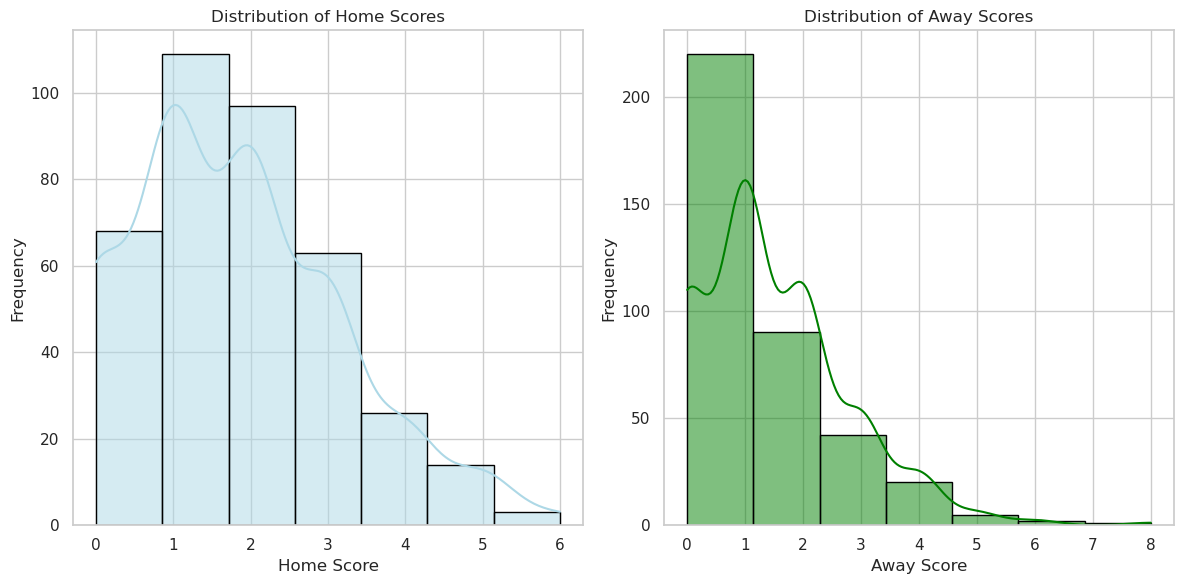

In [19]:
# Use histplot for better representation of the distributions: 

sns.set(style="whitegrid")

# Create a figure with two subplots for Home and Away scores
plt.figure(figsize=(12, 6))

# Home score distribution
plt.subplot(1, 2, 1)
sns.histplot(df_matches['Home Score'], bins=7, kde=True, color='lightblue', edgecolor='black')
plt.title('Distribution of Home Scores')
plt.xlabel('Home Score')
plt.ylabel('Frequency')

# Away score distribution 
plt.subplot(1, 2, 2)
sns.histplot(df_matches['Away Score'], bins=7, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Away Scores')
plt.xlabel('Away Score')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Score Distribution Analysis**

* Home Scores: The majority of home teams scored between 1 and 3 goals, with 2 goals being the most frequent outcome.

* Away Scores: Away teams most frequently scored 1 goal, with fewer occurrences of higher scores (beyond 3).

***These visualizations confirm the trend that home teams generally outperform away teams in terms of scoring.***

### Team Performance Analysis:

Next, I will explore which teams have performed best by analyzing their win rates and total goals scored.

**Which team has the highest win rate and scores the most goals?**

In [20]:
# Define win/loss/draw based on scores
df_matches['Result'] = df_matches.apply(lambda row: 'Home Win' if row['Home Score'] > row['Away Score'] 
                            else 'Away Win' if row['Home Score'] < row['Away Score'] 
                            else 'Draw', axis=1)

# Calculate total goals and win rate for each team
home_performance = df_matches.groupby('Home Team').agg(
    total_home_goals=('Home Score', 'sum'),
    home_wins=('Result', lambda x: (x == 'Home Win').sum()),
    home_matches=('Home Team', 'count')
)

away_performance = df_matches.groupby('Away Team').agg(
    total_away_goals=('Away Score', 'sum'),
    away_wins=('Result', lambda x: (x == 'Away Win').sum()),
    away_matches=('Away Team', 'count')
)

# Merge home and away performance
team_performance = home_performance.merge(away_performance, left_index=True, right_index=True)
team_performance['total_goals'] = team_performance['total_home_goals'] + team_performance['total_away_goals']
team_performance['total_matches'] = team_performance['home_matches'] + team_performance['away_matches']
team_performance['total_wins'] = team_performance['home_wins'] + team_performance['away_wins']

# Calculate win rate percentile
team_performance['win_rate'] = team_performance['total_wins'] / team_performance['total_matches']

# Display top 5 teams by win rate
teams_by_win_rate = team_performance.sort_values(by='win_rate', ascending=False)


teams_by_win_rate.head()


,total_home_goals,home_wins,home_matches,total_away_goals,away_wins,away_matches,total_goals,total_matches,total_wins,win_rate
Home Team,,,,,,,,,,
Arsenal FC,48,15,19,43,13,19,91,38,28,0.736842
Manchester City FC,51,14,19,45,14,19,96,38,28,0.736842
Liverpool FC,49,15,19,37,9,19,86,38,24,0.631579
Aston Villa FC,48,12,19,28,8,19,76,38,20,0.526316
Tottenham Hotspur FC,38,13,19,36,7,19,74,38,20,0.526316


In [21]:
# Reset index to have 'Home Team' as a column
teams_by_win_rate = teams_by_win_rate.reset_index()

# Create the scatter plot using 'Home Team' instead of 'Team'
fig = px.scatter(
    teams_by_win_rate,
    x='win_rate',
    y='total_goals',
    size='total_matches',
    color='Home Team',
    hover_name='Home Team',
    text='Home Team',
    size_max=60,
    labels={
        'win_rate': 'Win Rate',
        'total_goals': 'Total Goals Scored',
        'total_matches': 'Total Matches Played'
    },
    title='Team Performance: Win Rate vs Total Goals Scored',
    width=1200,
    height=600
)

# Update the layout for better aesthetics
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis=dict(title='Win Rate', tickformat='.0%', range=[0, 1]),
    yaxis=dict(title='Total Goals Scored'),
    legend_title_text='Teams',
    font=dict(size=12),
    title_font_size=20
)

# Show the plot
fig.show()


In [22]:
#Using bar-chart, display the graph of top 10 teams based on win rate. 
# Select the top N teams
top_n = 10
top_teams = teams_by_win_rate.head(top_n).reset_index()

# Create the bar chart for win rate
fig = px.bar(
    top_teams,
    x='Home Team',
    y='win_rate',
    text='win_rate',
    color='Home Team',
    labels={'Home Team': 'Team', 'win_rate': 'Win Rate'},
    title=f'Top {top_n} Teams by Win Rate',
    width=1200,
    height=600
)

# Update the layout for better aesthetics
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    yaxis_tickformat='.0%',
    yaxis_range=[0, 1],
    xaxis_title='Team',
    yaxis_title='Win Rate',
    font=dict(size=12),
    title_font_size=20
)

# Show the plot
fig.show()


In [23]:
# Visualising the distribution of match outcomes 
# Grouping the data by 'Result' to count occurrences
df_count = df_matches['Result'].value_counts().reset_index()
df_count.columns = ['Result', 'count']

# Create the bar chart
fig = px.bar(df_count, x='Result', y='count', text='count', color='Result', 
             color_discrete_sequence=px.colors.qualitative.Set2)

# Update layout (similar to title, labels in matplotlib)
fig.update_layout(
    title='Distribution of Match Outcomes',
    xaxis_title='Match Outcome',
    yaxis_title='Frequency',
    showlegend=False,
    width=800,  # width and height to mimic figsize
    height=600
)

# Customize text position (like annotating on bars in matplotlib)
fig.update_traces(textposition='outside')

# Show the plot
fig.show()


This outcome suggests that home teams generally perform better than away teams, which is a common pattern in football. 

The win rate reflects the common phenomenon of the "home advantage" in football, where home teams tend to perform better due to factors like crowd support, familiarity with the field, and reduced travel fatigue.

### Time-Series Analysis:

In the following analysis, I calculated the total goals scored per month to observe how scoring changes over time. This data allows us to see whether teams tend to score more or fewer goals in specific periods of the season.

**<p style="color:yellow;">I have made slight change to the chart after receiving a feedback from the classmates and the trainer. I decided to add the number of games played each month to the number of goals scored for better visualizations.</p>**


In [39]:
df_matches['Match Date'] = df_matches['Match Date'].dt.tz_localize(None)

# Add a column for total goals per match
df_matches['Total Goals'] = df_matches['Home Score'] + df_matches['Away Score']

# Aggregate total goals and matches per month
goals_and_matches_per_month = df_matches.groupby(df_matches['Match Date'].dt.to_period('M')).agg(
    total_goals=('Total Goals', 'sum'),
    matches_played=('Match Date', 'size')
).reset_index()

# Convert 'Match Date' to string for the plot
goals_and_matches_per_month['Match Date'] = goals_and_matches_per_month['Match Date'].astype(str)

# Create a line plot for total goals over time
fig = go.Figure()

# Line for total goals
fig.add_trace(go.Scatter(
    x=goals_and_matches_per_month['Match Date'], 
    y=goals_and_matches_per_month['total_goals'], 
    mode='lines+markers', 
    name='Total Goals',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Add a bar chart for the number of matches played each month
fig.add_trace(go.Bar(
    x=goals_and_matches_per_month['Match Date'], 
    y=goals_and_matches_per_month['matches_played'], 
    name='Matches Played', 
    yaxis='y2',
    opacity=0.6,
    marker=dict(color='lightgreen')
))


fig.update_layout(
    title='Total Goals Scored and Matches Played Over Time',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Goals'),
    yaxis2=dict(
        title='Matches Played', 
        overlaying='y', 
        side='right',
        tickformat='d'
    ),
    width=1000,
    height=600,
    legend=dict(x=0.1, y=1.1)
)

# Show the interactive plot
fig.show()


goals_and_matches_per_month

,Match Date,total_goals,matches_played
0,2023-08,86,29
1,2023-09,120,38
2,2023-10,97,33
3,2023-11,101,30
4,2023-12,206,66
5,2024-01,66,20
6,2024-02,158,42
7,2024-03,115,35
8,2024-04,179,53
9,2024-05,118,34


The season starts with moderate scoring, peaks in December, and then follows a pattern of fluctuating goal counts in the second half of the season.

* The spike in December aligns with the typical football season schedule, where more matches are played during the festive period.

* The decline in January may be due to fewer matches or player fatigue.

* The latter part of the season shows higher competitiveness, reflected in the increase in goal scoring, particularly in April.
 
This analysis suggests that external factors, such as scheduling and team form, play a significant role in goal trends throughout the season

The season starts with moderate scoring, peaks in December, and then follows a pattern of fluctuating goal counts in the second half of the season.

* The spike in December aligns with the typical football season schedule, where more matches are played during the festive period.

* The decline in January may be due to fewer matches or player fatigue.

* The latter part of the season shows higher competitiveness, reflected in the increase in goal scoring, particularly in April.
 
This analysis suggests that external factors, such as scheduling and team form, play a significant role in goal trends throughout the season

### Goal Distribution by Team

In this analysis, I will investigate which teams score the most goals, both home and away.

In [42]:
# Calculate total goals scored by each team (home + away)
team_goal_distribution = df_matches.groupby('Home Team').agg(total_home_goals=('Home Score', 'sum')).reset_index()
away_goals = df_matches.groupby('Away Team').agg(total_away_goals=('Away Score', 'sum')).reset_index()

# Merge home and away goals
team_goal_distribution = pd.merge(team_goal_distribution, away_goals, left_on='Home Team', right_on='Away Team')
team_goal_distribution['total_goals'] = team_goal_distribution['total_home_goals'] + team_goal_distribution['total_away_goals']

# Sort by total goals scored
team_goal_distribution_sorted = team_goal_distribution.sort_values(by='total_goals', ascending=False)


team_goal_distribution_sorted[['Home Team', 'total_goals']]



,Home Team,total_goals
12,Manchester City FC,96
1,Arsenal FC,91
10,Liverpool FC,86
14,Newcastle United FC,85
6,Chelsea FC,77
2,Aston Villa FC,76
17,Tottenham Hotspur FC,74
18,West Ham United FC,60
13,Manchester United FC,57
7,Crystal Palace FC,57


In [47]:
#Plot the above result for better visualization:

# Sort the teams by total goals 
team_goal_distribution_sorted = team_goal_distribution_sorted.sort_values(by='total_goals')

# Create the bar chart 
fig = px.bar(
    team_goal_distribution_sorted,
    x='total_goals',
    y='Home Team',
    text='total_goals', 
    orientation='h',  
    color='Home Team',  
    color_continuous_scale='viridis'  
)

# Update the layout for a cleaner look
fig.update_layout(
    title='Total Goals Scored by Each Team',
    xaxis_title='Total Goals',
    yaxis_title='Teams',
    title_font_size=20,  
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14)),
    plot_bgcolor='white',  # White background for better readability
    width=1800, 
    height=600
)

# Customize the bar chart
fig.update_traces(
    texttemplate='%{text}', 
    textposition='outside',  
    marker_line_width=1.5, 
    marker_line_color='black'  
)

# Display the plot
fig.show()


> **This visualisation clearly depicts the disparity in goal-scoring abilities across teams in the league, highlighting which teams performed the best and which teams may need to improve their attacking strategies. The sorted nature of the chart allows for quick identification of both top-performing and under-performing teams.**

### Correlation Analysis: Exploring Match Attributes:

We will now explore the relationships between different match attributes, such as home advantage and score difference, to see if there are significant patterns

In [48]:
# Create the 'Score Difference' column
df_matches['Score Difference'] = df_matches['Home Score'] - df_matches['Away Score']


In [49]:
# Correlation matrix between numerical columns
correlation_matrix = df_matches[['Home Score', 'Away Score', 'Score Difference']].corr()

# Display the correlation matrix
correlation_matrix


,Home Score,Away Score,Score Difference
Home Score,1.000000,-0.215618,0.796047
Away Score,-0.215618,1.000000,-0.762640
Score Difference,0.796047,-0.762640,1.000000


In [56]:

# Using Plotly, create a heatmap to visualise the correlation
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=['Home Score', 'Away Score', 'Score Difference'],
    y=['Home Score', 'Away Score', 'Score Difference'],
    annotation_text=np.around(correlation_matrix.values, 2),
    colorscale='Viridis',  
    showscale=True  # Show the color bar for the heatmap
)

# Update layout
fig.update_layout(
    title_text='Correlation Heatmap of Home Score, Away Score, and Score Difference',
    title_font_size=20,
    width=1200,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100)
)

# Show the heatmap
fig.show()


Home Score and Score Difference are positively correlated, meaning that a higher home score increases the home team’s advantage.

Away Score and Score Difference are negatively correlated, indicating that more goals by the away team reduce the home team's lead or shift the match in favor of the away team.

There is a weak inverse relationship between the home and away scores, implying some minimal trade-off in scoring between teams.

* Home Score vs Away Score(-0.215618):

    * There is a weak negative correlation between the number of goals scored by the home team and the away team. 
    This means that, generally, when the home team scores more goals, the away team tends to score slightly fewer goals. 
    However, the correlation is weak, suggesting that the home and away teams' scores are not strongly dependent on each other

* Home Score vs Score Difference(0.796047): 

    - There is a strong positive correlation between the home score and the score difference. This makes sense because the score difference is calculated as the home team's score minus the away team's score.
     A higher home score usually leads to a larger score difference in favor of the home team.

*  Away Score vs Score Difference(0.762640):

    * There is a strong negative correlation between the away score and the score difference. This indicates that as the away team scores more goals, the score difference becomes smaller or more negative. 
    This is logical because the score difference decreases when the away team scores more, reducing the advantage of the home team or shifting it in favor of the away team.

### Conclusion:

This exploratory data analysis (EDA) has provided a comprehensive examination of the dataset containing football match results, focusing on key aspects such as score distributions, team performance, and match outcomes. A detailed analysis of 380 football matches uncovered valuable insights, summarized below:

> Outcome Analysis:

* Home Wins were the most frequent result, underscoring the significance of home-field advantage, followed by Draws and Away Wins.

> Score Distribution:

* Home teams averaged 1.8 goals per match, while away teams averaged 1.48 goals. The higher goal average for home teams further confirms the home advantage.

> Top Teams:

* Arsenal FC and Manchester City FC exhibited the highest win rates (73.7%) and scored the most goals, consistently performing well both at home and away. Other strong performers included Liverpool FC and Aston Villa FC.
    Teams that consistently scored high numbers of goals, regardless of venue, ranked among the most successful throughout the season.

> Score Differences:

* Most matches ended with small score differences (1-2 goals), reflecting the competitive nature of the league. Large-margin victories were less common and mostly favored home teams.

> Correlation Analysis:

* A strong positive correlation (0.79) between home scores and score differences reinforces the impact of home advantage. Conversely, away scores showed a negative correlation (-0.76) with score differences, indicating that higher away goals tend to reduce the home team’s lead.

* These correlations highlight the dynamic between home team dominance and the resilience of away teams, with home teams generally in control but away teams occasionally challenging that dominance.

> Key Insights:

* Home teams enjoy a clear advantage in both scoring and match outcomes.
* The league is highly competitive, with many matches being closely contested, as evidenced by the narrow goal margins.
* Top-performing teams, such as `Arsenal` and `Manchester City`, consistently dominated both at home and away, showing exceptional balance in their overall performance.

Future Considerations:

This EDA has yielded valuable insights into the dynamics of football matches, particularly emphasizing the crucial role of home advantage and the strong performances of top teams. However, future analysis could delve deeper into more granular aspects, such as:

* Evaluating individual player performance.
* Assessing external factors like weather conditions or team form.

Incorporating these elements would provide a more comprehensive understanding of the key drivers of success, both in individual matches and throughout the league. This broader perspective could offer more actionable insights for team strategies and match preparation in the future.

### Reference: 

    - Code : Perplexity/ChatGPT
    - Data source: https://www.football-data.org/
    - Image source: https://www.threads.net/@ola_kunley/post/C8XigRHtk5M

---



---



> > > > > > > > > © English Premier League Season 2023 Explanatory Data Analysis


---



---
